<a href="https://colab.research.google.com/github/Gracepicharporn/Data-Science-project/blob/main/Summation_Classification_appilance_status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Summation method

## UK-DALE

### Building1

Dowload Dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Image with fridge**

In [4]:
dir = '/content/gdrive/MyDrive/data-device/UK-DALE-data/sum/building1/train-fridge'
train_datagen = ImageDataGenerator(
      samplewise_std_normalization= True,
      validation_split = 0.2)
train_generator =train_datagen.flow_from_directory(
     dir,  # train folder
     batch_size = 64,  # define batch size
     shuffle=True,  # shuffle the train dataset
     subset = 'training',
     target_size = (224,224)

)

test_generator =train_datagen.flow_from_directory(
     dir,  # test folder
     batch_size= 1,  # define batch size (1 for test dataset)
     shuffle=True,  
     subset = 'validation',
     target_size = (224, 224)

)
                    

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 2608 images belonging to 2 classes.
Found 650 images belonging to 2 classes.


In [5]:
# shape of dataset
trainShape=train_generator.__getitem__(0)[0].shape  # train shape
testShape=test_generator.__getitem__(0)[0].shape  # test shape
print("Train Shape \n",trainShape)
print("Test Shape \n",testShape)

Train Shape 
 (64, 224, 224, 3)
Test Shape 
 (1, 224, 224, 3)


In [6]:
from tensorflow.keras.applications import VGG16  # VGG16 pre-trained model
import tensorflow as tf  # for deep learning
from tensorflow.keras import Model  # for creating a model
from sklearn.metrics import confusion_matrix, classification_report  # for calculating precision, recall, f1-score, and accuracy
import pandas as pd  # for creating a table
import numpy as np  # for calculating numeric values
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping  # for learning rate reduction and early stopping
lr_reduce = ReduceLROnPlateau(monitor='accuracy', patience=1)  # learning rate reduction
early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)  # early stopping

def pretrained_model(model):
  '''
    Create a model from a pre-trained model by adding 1 3-nodes dense layer on top
    of the model
    Input:
      model: a pre-trained model
    Output:
      a model 
  '''
  # define a pre-trained model without the top layers, and with the default weights
  pre_trained_model = model(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
  pre_trained_model.trainable = False  # freeze the weights
  pre_trained_model.summary()

  x = tf.keras.layers.Flatten()(pre_trained_model.output)  # flatten layer
  x = tf.keras.layers.Dense(2 , activation='sigmoid')(x)  # 1 3-nodes dense layer
  model = Model(pre_trained_model.input, x) 
  model.summary()

  return model

def train(model):
  '''
    train the model
    Input:
      model: a model
    Output:
      history of the training process
  '''
  # compile the model with specific configuration
  model.compile(optimizer='adam', loss="binary_crossentropy",metrics=['accuracy'])
  # train the model for 10 epochs and 30 steps for each epoch
  history = model.fit(train_generator, validation_data = test_generator, epochs = 30, 
                      callbacks=[lr_reduce, early_stop])
  return history

def plot_train_evaluation(history, model):
  '''
    Plot train loss and acuracy. Then, evaluate the model (precision, recall, f1-score, and accuracy) with test dataset
    Input:
      history: a history of the training process
      model: a model
    Output:
      test report (DataFrame)
  '''
  # train loss and accuracy plot
  plt.figure(figsize=(12, 8))  # define figure size
  plt.subplot(2, 2, 1)  # create a subplot
  plt.plot(history.history['val_accuracy'], label='val_accuracy') 
  plt.plot(history.history['accuracy'], label='train_accuracy') 
  plt.legend()  # plot legend
  plt.xlabel('epochs')  # define x label
  plt.title('Accuracy plot')  # define title

  plt.subplot(2, 2, 2)  # create a subplot
  plt.plot(history.history['val_loss'], label='val_loss') 
  plt.plot(history.history['loss'], label='train_loss') 
  plt.legend()  # plot legend
  plt.xlabel('epochs')  # define x label
  plt.title('Loss plot')  # define title
  plt.show()  # show all plots

  # print out average, max, and min of train accuracy and loss
  print('average train accuracy: ', sum(history.history['accuracy'])/len(history.history['accuracy']))
  print('max train accuracy: ', max(history.history['accuracy']))
  print('average train loss: ', sum(history.history['loss'])/len(history.history['loss']))
  print('min train loss: ', min(history.history['loss']))

  print('#########################################################')
  # print out average, max, and min of validation accuracy and loss
  print('average train accuracy: ', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))
  print('max train accuracy: ', max(history.history['val_accuracy']))
  print('average train loss: ', sum(history.history['val_loss'])/len(history.history['val_loss']))
  print('min train loss: ', min(history.history['val_loss']))


In [7]:
# VGG16 pre-trained model
model1 = pretrained_model(VGG16)

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [8]:
# train the model
history1 = train(model1)

Epoch 1/30
41/41 [==============================] - 688s 16s/step - loss: 0.7718 - accuracy: 0.4900 - val_loss: 0.7118 - val_accuracy: 0.5092 - lr: 0.0010
Epoch 2/30
41/41 [==============================] - 20s 487ms/step - loss: 0.7224 - accuracy: 0.4931 - val_loss: 0.6991 - val_accuracy: 0.5354 - lr: 0.0010
Epoch 3/30
41/41 [==============================] - 20s 494ms/step - loss: 0.7259 - accuracy: 0.5142 - val_loss: 0.8325 - val_accuracy: 0.5015 - lr: 0.0010
Epoch 4/30
41/41 [==============================] - 20s 489ms/step - loss: 0.7575 - accuracy: 0.4977 - val_loss: 0.7175 - val_accuracy: 0.5462 - lr: 0.0010
Epoch 5/30
41/41 [==============================] - 20s 486ms/step - loss: 0.6825 - accuracy: 0.5560 - val_loss: 0.7022 - val_accuracy: 0.5446 - lr: 1.0000e-04
Epoch 6/30
41/41 [==============================] - 20s 486ms/step - loss: 0.6837 - accuracy: 0.5525 - val_loss: 0.6980 - val_accuracy: 0.5400 - lr: 1.0000e-04
Epoch 7/30
41/41 [==============================] - 20s 4

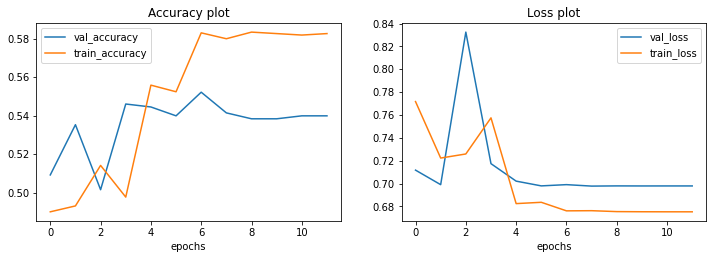

average train accuracy:  0.5498466193675995
max train accuracy:  0.5835889577865601
average train loss:  0.699827715754509
min train loss:  0.6753414869308472
#########################################################
average train accuracy:  0.5356410344441732
max train accuracy:  0.552307665348053
average train loss:  0.712498719493548
min train loss:  0.697836697101593


In [9]:
# training and testing results
plot_train_evaluation(history1, model1)

In [10]:
model1.save("baseline-Summation-UKDALE.h5")

In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16  
import tensorflow as tf 
from tensorflow.keras import Model  
from sklearn.metrics import confusion_matrix, classification_report  

In [12]:
model2 = load_model('baseline-Summation-UKDALE.h5')

In [13]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**Kettle**

In [14]:
dir2 = '/content/gdrive/MyDrive/data-device/UK-DALE-data/sum/building1/train-kettle'
train_datagen2 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator2 = train_datagen2.flow_from_directory(
     dir2,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 3258 images belonging to 2 classes.


In [15]:
y_predict1 = model2.evaluate(train_generator2, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 507s 5s/step - loss: 0.7081 - accuracy: 0.4994


In [16]:
y_predict1 

{'loss': 0.7080569863319397, 'accuracy': 0.49938613176345825}

In [17]:
model3 = load_model('baseline-Summation-UKDALE.h5')

**Washer Dryer**

In [18]:
dir3 = '/content/gdrive/MyDrive/data-device/UK-DALE-data/sum/building1/train-washer'
train_datagen3 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator3 = train_datagen3.flow_from_directory(
     dir3,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 3258 images belonging to 2 classes.


In [19]:
y_predict2 = model3.evaluate(train_generator3, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 698s 7s/step - loss: 0.7043 - accuracy: 0.5055


In [20]:
y_predict2

{'loss': 0.7043279409408569, 'accuracy': 0.5055248737335205}

### Across House






**Fridge**

In [21]:
model4 = load_model('baseline-Summation-UKDALE.h5')

In [22]:
dir4 = '/content/gdrive/MyDrive/data-device/UK-DALE-data/sum/across-building/train-fridge'
train_datagen4 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator4 = train_datagen4.flow_from_directory(
     dir4,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 3258 images belonging to 2 classes.


In [23]:
y_predict4 = model4.evaluate(train_generator4, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 23s 218ms/step - loss: 0.7043 - accuracy: 0.5055


In [24]:
y_predict4

{'loss': 0.704328179359436, 'accuracy': 0.5055248737335205}

**kettle**

In [25]:
dir5 = '/content/gdrive/MyDrive/data-device/UK-DALE-data/sum/across-building/train-kettle'
train_datagen5 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator5 = train_datagen5.flow_from_directory(
     dir5,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 3258 images belonging to 2 classes.


In [26]:
y_predict5 = model4.evaluate(train_generator5, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 467s 5s/step - loss: 0.7252 - accuracy: 0.4570


In [27]:
y_predict5

{'loss': 0.7252278923988342, 'accuracy': 0.457028865814209}

**Washer Dyer**

In [28]:
dir6 = '/content/gdrive/MyDrive/data-device/UK-DALE-data/sum/across-building/train-washer'
train_datagen6 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator6 = train_datagen6.flow_from_directory(
     dir6,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 3258 images belonging to 2 classes.


In [29]:
y_predict6 = model4.evaluate(train_generator6, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 527s 5s/step - loss: 0.7159 - accuracy: 0.4831


In [30]:
y_predict6

{'loss': 0.7159176468849182, 'accuracy': 0.48311847448349}

## REDD dataset

### building1

**fridge**

In [31]:
dir7 = '/content/gdrive/MyDrive/data-device/REDD-data/SUM/building1/train-fridge'
train_datagen7 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator7 = train_datagen7.flow_from_directory(
     dir7,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 72 images belonging to 2 classes.


In [32]:
y_predict7 = model4.evaluate(train_generator7, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 16s 8s/step - loss: 0.7074 - accuracy: 0.5278


In [33]:
y_predict7

{'loss': 0.7073955535888672, 'accuracy': 0.5277777910232544}

**microwave**

In [34]:
dir8 = '/content/gdrive/MyDrive/data-device/REDD-data/SUM/building1/train-microwave'
train_datagen8 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator8 = train_datagen8.flow_from_directory(
     dir8,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 72 images belonging to 2 classes.


In [35]:
y_predict8 = model4.evaluate(train_generator8, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 14s 7s/step - loss: 0.7116 - accuracy: 0.4861


In [36]:
y_predict8 

{'loss': 0.7115598320960999, 'accuracy': 0.4861111044883728}

**washer Dryer**

In [37]:
dir9 = '/content/gdrive/MyDrive/data-device/REDD-data/SUM/building1/train-washer'
train_datagen9 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator9 = train_datagen9.flow_from_directory(
     dir9,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 72 images belonging to 2 classes.


In [38]:
y_predict9 = model4.evaluate(train_generator9, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 13s 6s/step - loss: 0.7165 - accuracy: 0.5000


In [39]:
y_predict9

{'loss': 0.7164817452430725, 'accuracy': 0.5}

### Across Builidng

**fridge**

In [44]:
dir10 = '/content/gdrive/MyDrive/data-device/REDD-data/SUM/acoss-builing/train-fridge'
train_datagen10 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator10 = train_datagen10.flow_from_directory(
     dir10,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 72 images belonging to 2 classes.


In [41]:
y_predict10 = model4.evaluate(train_generator10, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 15s 7s/step - loss: 0.6636 - accuracy: 0.5833


In [42]:
y_predict10 

{'loss': 0.6635839939117432, 'accuracy': 0.5833333134651184}

**Microwave**

In [45]:
dir11 = '/content/gdrive/MyDrive/data-device/REDD-data/SUM/acoss-builing/train-microwave'
train_datagen11 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator11 = train_datagen11.flow_from_directory(
     dir11,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 72 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [46]:
y_predict11 = model4.evaluate(train_generator11, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 14s 7s/step - loss: 0.7054 - accuracy: 0.4722


In [47]:
y_predict11

{'loss': 0.7053844928741455, 'accuracy': 0.4722222089767456}

**Washer Dryer**

In [48]:
dir12 = '/content/gdrive/MyDrive/data-device/REDD-data/SUM/acoss-builing/train-washer'
train_datagen12 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator12 = train_datagen12.flow_from_directory(
     dir12,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 72 images belonging to 2 classes.


In [49]:
y_predict12 = model4.evaluate(train_generator12, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 15s 7s/step - loss: 0.7138 - accuracy: 0.5000


In [50]:
y_predict12

{'loss': 0.7137542366981506, 'accuracy': 0.5}